# YELP DATASET


# Goal: Using user information to improve restaurants quality


### One: Review 
> #### Is there a common theme in users' first review? If yes, what is the prevelant theme? 

### Two: Elite User Program: 

> #### a. What factors make a user become elite? ( Quality vs Quantity ) 
>
#### b. Is there a trend in users'reviews? If yes, what subtopics they usually pay attention to? 
>
#### c. How many year each user maintain the elite status? 
>
#### d. Is there any user who has quality review and/or with high quantity that does not have elite status? Does it affect there loyalty for yelp?
>
#### e. Do most people leave reviews when they travel?

### Three: Tip 
> #### Correlation between tips & reviews. What makes one to leave tips? Tips predictions.


Dataset Source: https://www.yelp.com/dataset_challenge

In [1]:
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns
import re
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.decomposition.online_lda import LatentDirichletAllocation
import string
from sklearn.pipeline import Pipeline

Populating the interactive namespace from numpy and matplotlib


# Read Data

In [2]:
user = pd.read_csv('csv/user.csv')
business = pd.read_csv('csv/business.csv')
review = pd.read_csv('csv/review.csv')
tip = pd.read_csv('csv/tip.csv')

/Users/Charlotte/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (1,4,7,17,26,29,49,60,62,79,86,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# review.business_id.value_counts()

In [3]:
def rename_column(file):
    new_names = list()
    for col in file:
        new_names.append(col.replace('.', '_', len(col)).replace(' ', '_', len(col)).lower())
    return new_names

In [4]:
user.columns = rename_column(user.columns)
business.columns = rename_column(business.columns)
business.columns = [ re.sub('attributes_', '', c) for c in business.columns ]
review.columns = rename_column(review.columns)

In [ ]:
user = user.ix[user['review_count'] != 0]
user = user.drop(['type','friends'],axis = 1 )

In [ ]:
review = review.drop('type',axis = 1)
business = business.drop('type',axis = 1)
tip = tip.drop('type',axis = 1)

In [ ]:
user = user.reset_index()

In [ ]:
user.tail(2)

# Convert csv to sql database

In [ ]:
# user.to_sql('user', conn)
# business.to_sql('business', conn)
# review.to_sql('review', conn)

# Data visualization

In [ ]:
# to find how many users in each elite year period
user['elite_year']  = [ len(i.split(',')) for i in user['elite']]

# Number of years since  Yelp Membership Start Year until Elite Status

In [ ]:
user['elite_since'] = [i.replace('[','').replace(']','').split(',')[0] for i in user['elite']]

In [ ]:
user['elite_since'] = [int(i) if i!= '' else 0 for i in user['elite_since'] ]

In [ ]:
user['year_before_elite'] = [ user['elite_since'][i] - int(user['yelping_since'][i].split("-")[0]) if  user['elite_since'][i]!= 0 else 0 for i in range(686543)]

In [ ]:
elite_dict = Counter(user['year_before_elite'])

In [ ]:
elite_pd = pd.DataFrame(list(elite_dict.items()),index = None,columns = ['year','user_count'])
elite_pd

In [ ]:
member_since = user.groupby('yelping_since')['user_id'].count()
member_since = pd.DataFrame(member_since)

# Review

In [ ]:
a = Counter(review.user_id)
b = Counter(a.values()) # key : #review -- value: user count
b = dict(b)

In [ ]:
c = pd.DataFrame(list(b.items()),index = None,columns = ['review','user_count'])
print(len(c))
c.head(2)

In [ ]:
reviews_dict = dict()
label = ['one','two','three']
for i,label in enumerate(label):
    reviews_dict[label] = c.percentage[i]

In [ ]:
reviews_dict['four_ten']= sum(c.percentage[3:10])
reviews_dict['tens']= sum(c.percentage[10:100])
reviews_dict['more_than_hundred']= sum(c.percentage[100:-1])

In [ ]:
reviews_dict

In [ ]:
review_pd = pd.DataFrame(list(reviews_dict.items()),index = None,columns = ['review','user_percentage'])
review_pd

# Filter business category to restaurant only

In [ ]:
# create a dataframe with business id and category
all_businesses = pd.concat([business['business_id'], business['categories']], axis=1, keys=['business_id', 'category'])

In [ ]:
all_businesses.head(3)

In [ ]:
# get index of businesses that are not restaurants
not_restaurant = [i for i,e in enumerate(all_businesses.values) if "Restaurant" not in e[1]]

In [ ]:
all_businesses.drop(all_businesses.index[not_restaurant], inplace=True)

In [ ]:
restaurant = all_businesses # after dropping all businesses that are not restaurants 

In [ ]:
restaurant = restaurant.reset_index() # reset the index 

In [ ]:
restaurant = restaurant.drop('index',axis = 1) # drop the old index 

In [ ]:
restaurant.head(2)

In [ ]:
# len(restaurant) # 26729 -- number of businesses
# len(restaurant.category.unique()) #4318--- number of unique categories 

In [ ]:
k = Counter(restaurant.category) # 4318 -- Count number of businesses / unique category --- most categories are very similar 

In [ ]:
label = [k for k,v in k.items() if v >100] # 41 --- get the label that has more than 100 businesses

In [ ]:
label[:5]

# User First ever review Rating Star

In [ ]:
idx = df.groupby(['Mt'])['count'].transform(max) == df['count']

In [ ]:
idx = restaurant_review.groupby(['user_id'])['date'].transform(min) == restaurant_review['date']

In [ ]:
first = restaurant_review[idx]

# Get Reviews for Restaurants only

In [ ]:
review_indices = review['business_id'].isin(restaurant['business_id'])

In [ ]:
restaurant_review = review[review_indices]

In [ ]:
review_count = Counter(restaurant_review['business_id']) ### number of restaurants
print(len(review_count))
top_restaurant = [(k,v)for k,v in review_count.items() if v > 300]#number of restaurants that have more than 300 reviews
top_restaurant[:10]
sorted_by_second = sorted(top_restaurant, key=lambda tup: tup[1])
sorted_by_second[-5:]

In [ ]:
business.ix[business['business_id'] == 'dcd3C1gWv-vVdQ9XYV8Ubw']

In [ ]:
selected_restaurants = pd.DataFrame(sorted_by_second,columns = ['business_id','review_count'])

In [ ]:
selected_restaurants.tail()

In [ ]:
restaurant_review['text']  =  [re.sub('['+string.punctuation+']', '', i.lower().replace('\n','')) for i in restaurant_review['text']]

In [ ]:
restaurant_review['text'][0]

In [ ]:
user.ix[user['user_id'] == 'qEE5EvV-f-s7yHC0Z4ydJQ']

In [ ]:
elite_user = (user['user_id'].ix[user['elite_since'] != 0])
not_elite_user = (user['user_id'].ix[user['elite_since'] == 0])

In [74]:
# elite_index = user[user['elite_since'] != 0].index.tolist()

In [83]:
elite_index = restaurant_review['user_id'].isin(elite_user )
not_elite_index = restaurant_review['user_id'].isin(not_elite_user)

In [94]:
elite_review = restaurant_review[elite_index ]
not_elite_review = restaurant_review[not_elite_index]

# Export to pickle

In [58]:
# restaurant_review.to_pickle('data/review') 
# business.to_pickle('data/business')
# user.to_pickle('data/user')


In [55]:
# checking = pd.read_pickle('csv/test')
# # checking = pd.read_csv('csv/restaurant_review.csv')


In [57]:
restaurant.head(2)

,business_id,category
0,5UmKMjUEUNdYWqANhGckJw,"['Fast Food', 'Restaurants']"
1,mVHrayjG3uZ_RLHkLj-AMg,"['Bars', 'American (New)', 'Nightlife', 'Loung..."


In [284]:
def days_late_xform(dl):
    if dl > 500: return 'more_1000'
    elif 300 < dl <= 500: return 'f'
    elif 100 < dl <= 300: return 'd'
    elif 80 < dl <= 100: return 'd'
    elif 50 < dl <= 80: return 'c'
    elif 20 < dl <= 50: return 'b'
    elif 10 < dl <= 20: return '10_20'
    elif 5 < dl <= 10: return '5_10'
    elif 2 < dl <= 3: return 'three'
    elif 1 < dl <= 2: return 'two'
    elif 0 < dl <= 1: return 'one'
    else: return 'None'

k = df['count'].map(days_late_xform)

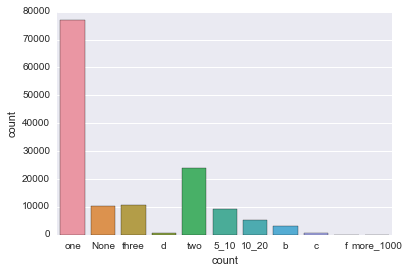

In [285]:
plt.figure(figsize=(15,5))
sns.countplot(k.ix[k != "i"])